In [4]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Load the dataset
file_path = 'C:\\Users\\ronch\\Downloads\\league_of_legends_data_large.csv'
data = pd.read_csv(file_path)

# Step 2: Split data into features and target
X = data.drop('win', axis=1)
y = data['win']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Confirm the shapes and types of tensors
{
    "X_train_tensor_shape": X_train_tensor.shape,
    "X_test_tensor_shape": X_test_tensor.shape,
    "y_train_tensor_shape": y_train_tensor.shape,
    "y_test_tensor_shape": y_test_tensor.shape
}


{'X_train_tensor_shape': torch.Size([800, 8]),
 'X_test_tensor_shape': torch.Size([200, 8]),
 'y_train_tensor_shape': torch.Size([800]),
 'y_test_tensor_shape': torch.Size([200])}

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

# Step 1: Define the Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        # Define a single linear layer
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        # Apply sigmoid activation to the linear layer's output
        return torch.sigmoid(self.linear(x))

# Step 2: Initialize the Model, Loss Function, and Optimizer

# Get input dimension from training data (ensure you have X_train_tensor from Step 1)
input_dim = X_train_tensor.shape[1]  # Number of features

# Initialize the model
model = LogisticRegressionModel(input_dim)

# Initialize the loss function (Binary Cross-Entropy Loss)
loss_function = nn.BCELoss()

# Initialize the optimizer (Stochastic Gradient Descent with learning rate 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Output model details for verification
{
    "Model Architecture": model,
    "Loss Function": loss_function,
    "Optimizer": optimizer
}


{'Model Architecture': LogisticRegressionModel(
   (linear): Linear(in_features=8, out_features=1, bias=True)
 ),
 'Loss Function': BCELoss(),
 'Optimizer': SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 )}

In [10]:
# Number of epochs for training
epochs = 1000
# Training loop
for epoch in range(epochs):
    # Set the model to training mode
    model.train()    
    # Zero the gradients
    optimizer.zero_grad()  
    # Forward pass: Get predictions
    outputs = model(X_train_tensor)    
    # Compute the loss
    loss = loss_function(outputs.squeeze(), y_train_tensor)    
    # Backward pass: Compute gradients
    loss.backward()    
    # Update model parameters
    optimizer.step()    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
# Model evaluation
model.eval()  # Set the model to evaluation mode
# Evaluate training data
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    train_predictions = (train_outputs.squeeze() >= 0.5).float()
    train_accuracy = (train_predictions == y_train_tensor).float().mean().item()
# Evaluate testing data
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs.squeeze() >= 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor).float().mean().item()
# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Epoch [100/1000], Loss: 0.7153
Epoch [200/1000], Loss: 0.7036
Epoch [300/1000], Loss: 0.6964
Epoch [400/1000], Loss: 0.6920
Epoch [500/1000], Loss: 0.6893
Epoch [600/1000], Loss: 0.6877
Epoch [700/1000], Loss: 0.6868
Epoch [800/1000], Loss: 0.6862
Epoch [900/1000], Loss: 0.6858
Epoch [1000/1000], Loss: 0.6856
Training Accuracy: 0.5537
Testing Accuracy: 0.4950


In [12]:
# Step 1: Modify the optimizer to include L2 regularization (weight_decay)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
# Step 2: Train the model with L2 regularization
epochs = 1000
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Zero the gradients    
    # Forward pass
    outputs = model(X_train_tensor)    
    # Compute the loss
    loss = loss_function(outputs.squeeze(), y_train_tensor)    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()   
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
# Step 3: Evaluate the optimized model
model.eval()  # Set the model to evaluation mode
# Evaluate training data
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    train_predictions = (train_outputs.squeeze() >= 0.5).float()
    train_accuracy = (train_predictions == y_train_tensor).float().mean().item()
# Evaluate testing data
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs.squeeze() >= 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor).float().mean().item()
# Step 4: Print the results
print(f"Training Accuracy (L2 Regularization): {train_accuracy:.4f}")
print(f"Testing Accuracy (L2 Regularization): {test_accuracy:.4f}")


Epoch [100/1000], Loss: 0.6855
Epoch [200/1000], Loss: 0.6854
Epoch [300/1000], Loss: 0.6853
Epoch [400/1000], Loss: 0.6853
Epoch [500/1000], Loss: 0.6853
Epoch [600/1000], Loss: 0.6853
Epoch [700/1000], Loss: 0.6853
Epoch [800/1000], Loss: 0.6853
Epoch [900/1000], Loss: 0.6853
Epoch [1000/1000], Loss: 0.6853
Training Accuracy (L2 Regularization): 0.5437
Testing Accuracy (L2 Regularization): 0.5050


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns


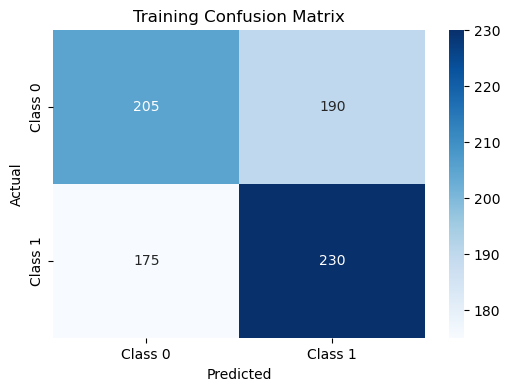

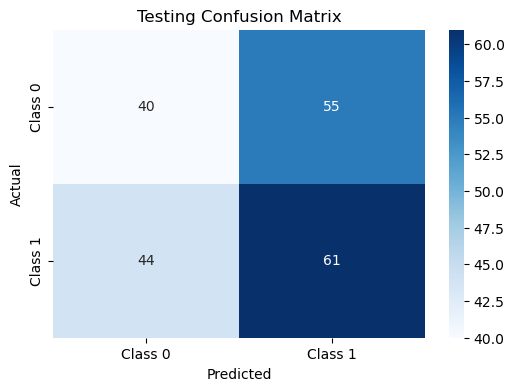

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.52      0.53       395
         1.0       0.55      0.57      0.56       405

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.54      0.54       800


Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.42      0.45        95
         1.0       0.53      0.58      0.55       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



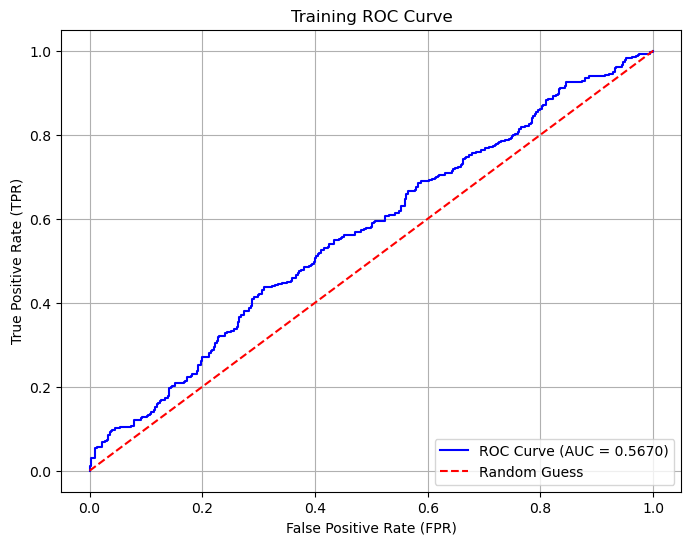

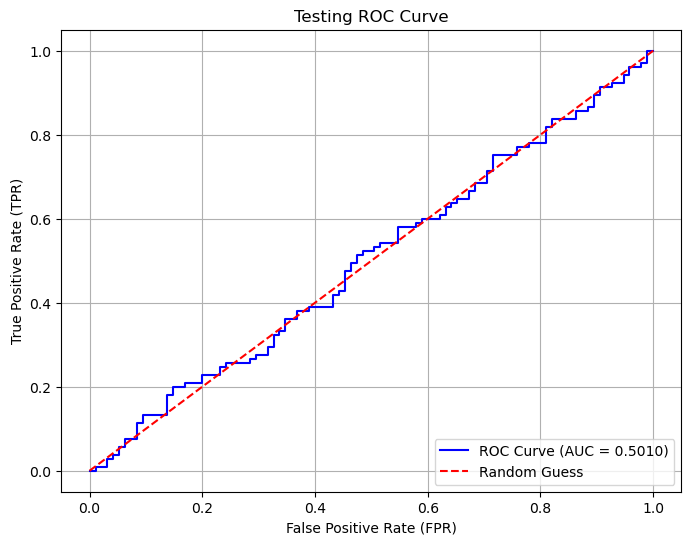

In [16]:
# Step 1: Retrain the model with L2 regularization (using the previous code)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = loss_function(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
# Step 2: Model Evaluation
model.eval()
# Predictions and probabilities for training and testing sets
with torch.no_grad():
    train_probs = model(X_train_tensor).squeeze()
    test_probs = model(X_test_tensor).squeeze()  
    train_preds = (train_probs >= 0.5).float()
    test_preds = (test_probs >= 0.5).float()
# Step 3: Confusion Matrix
train_cm = confusion_matrix(y_train_tensor.numpy(), train_preds.numpy())
test_cm = confusion_matrix(y_test_tensor.numpy(), test_preds.numpy())
# Visualizing the confusion matrix
def plot_confusion_matrix(cm, title, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
plot_confusion_matrix(train_cm, "Training Confusion Matrix", labels=["Class 0", "Class 1"])
plot_confusion_matrix(test_cm, "Testing Confusion Matrix", labels=["Class 0", "Class 1"])
# Step 4: Classification Report
print("Training Classification Report:")
print(classification_report(y_train_tensor.numpy(), train_preds.numpy()))
print("\nTesting Classification Report:")
print(classification_report(y_test_tensor.numpy(), test_preds.numpy()))
# Step 5: ROC Curve
def plot_roc_curve(y_true, probs, title):
    fpr, tpr, _ = roc_curve(y_true, probs)
    roc_auc = auc(fpr, tpr) 
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
# Plot ROC curve for training data
plot_roc_curve(y_train_tensor.numpy(), train_probs.numpy(), "Training ROC Curve")
# Plot ROC curve for testing data
plot_roc_curve(y_test_tensor.numpy(), test_probs.numpy(), "Testing ROC Curve")


In [18]:
# Step 1: Save the model's state dictionary
torch.save(model.state_dict(), 'logistic_regression_model.pth')
print("Model saved successfully!")

# Step 2: Load the saved model
# Create a new instance of the model
loaded_model = LogisticRegressionModel(input_dim)

# Load the saved parameters into the new model instance
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))
print("Model loaded successfully!")

# Step 3: Evaluate the loaded model on the test dataset
loaded_model.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Disable gradient computation
    test_outputs = loaded_model(X_test_tensor)
    test_predictions = (test_outputs.squeeze() >= 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor).float().mean().item()

# Step 4: Print the test accuracy
print(f"Test Accuracy (Loaded Model): {test_accuracy:.4f}")


Model saved successfully!
Model loaded successfully!
Test Accuracy (Loaded Model): 0.5050


C:\Users\ronch\AppData\Local\Temp\ipykernel_2848\277609488.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('logistic_regression_

In [30]:
# Define learning rates to test
learning_rates = [0.01, 0.05, 0.1]
epochs = 50  # Train for 50 epochs for each learning rate
best_lr = None
best_test_accuracy = 0
# Dictionary to store results
results = {}
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")    
    # Reinitialize the model and optimizer for each learning rate
    model = LogisticRegressionModel(input_dim)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)  # Include L2 regularization    
    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()        
        # Forward pass
        outputs = model(X_train_tensor)
        loss = loss_function(outputs.squeeze(), y_train_tensor)       
        # Backward pass and optimization
        loss.backward()
        optimizer.step()       
        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")    
    # Evaluate the model on the test dataset
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_predictions = (test_outputs.squeeze() >= 0.5).float()
        test_accuracy = (test_predictions == y_test_tensor).float().mean().item()  
    # Store the accuracy for this learning rate
    results[lr] = test_accuracy  
    # Check if this learning rate gives the best accuracy
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_lr = lr
# Print the results
print("\nLearning Rate Performance:")
for lr, acc in results.items():
    print(f"Learning Rate: {lr:.2f}, Test Accuracy: {acc:.4f}")
print(f"\nBest Learning Rate: {best_lr:.2f}, Best Test Accuracy: {best_test_accuracy:.4f}")


Training with learning rate: 0.01
Epoch [10/50], Loss: 0.7459
Epoch [20/50], Loss: 0.7433
Epoch [30/50], Loss: 0.7408
Epoch [40/50], Loss: 0.7384
Epoch [50/50], Loss: 0.7361
Training with learning rate: 0.05
Epoch [10/50], Loss: 0.7306
Epoch [20/50], Loss: 0.7207
Epoch [30/50], Loss: 0.7129
Epoch [40/50], Loss: 0.7068
Epoch [50/50], Loss: 0.7020
Training with learning rate: 0.1
Epoch [10/50], Loss: 0.7229
Epoch [20/50], Loss: 0.7093
Epoch [30/50], Loss: 0.7005
Epoch [40/50], Loss: 0.6948
Epoch [50/50], Loss: 0.6913

Learning Rate Performance:
Learning Rate: 0.01, Test Accuracy: 0.4950
Learning Rate: 0.05, Test Accuracy: 0.4500
Learning Rate: 0.10, Test Accuracy: 0.5550

Best Learning Rate: 0.10, Best Test Accuracy: 0.5550


        Feature  Importance  Absolute Importance
0         kills    0.194747             0.194747
5  wards_placed    0.150874             0.150874
6  wards_killed   -0.107219             0.107219
2       assists    0.089166             0.089166
1        deaths    0.078483             0.078483
4            cs    0.045330             0.045330
3   gold_earned    0.044692             0.044692
7  damage_dealt   -0.024867             0.024867


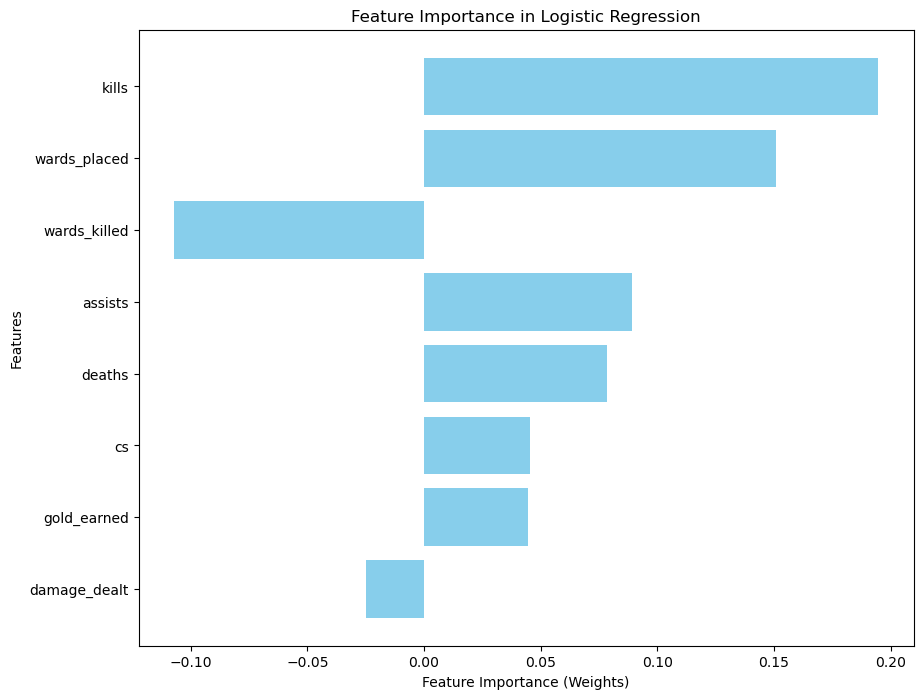

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Extract model weights
# Extract the weights of the logistic regression model
weights = model.linear.weight.data.numpy().flatten()  # Flatten the tensor to a 1D array

# Step 2: Create a DataFrame for feature importance
feature_names = X_train.columns  # Get feature names from the training dataset
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": weights
})

# Sort features by absolute importance values in descending order
feature_importance["Absolute Importance"] = feature_importance["Importance"].abs()
feature_importance = feature_importance.sort_values(by="Absolute Importance", ascending=False)

# Display the sorted feature importance
print(feature_importance)

# Step 3: Visualize the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color='skyblue')
plt.xlabel("Feature Importance (Weights)")
plt.ylabel("Features")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()
